**utility NB for clustering lecture PUI class**

** FBB November 2015**

** Revisions, November 2016, December 2017**

# CLUSTERING 

topics:
    
    KMeans
    DBScan
    Agglomerative
    distances
    linkages
    basemap

In [12]:
__author__ = 'fbb'

from __future__ import print_function, division

%pylab inline
import numpy as np
import pylab as pl
import pandas as pd

import datetime as dt
import requests
import json
import os
s = json.load( open("../fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#image ptocessing
from PIL import Image
from scipy.misc import imread


kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# THANKSGIVING TWEETS CLUSTERING ANALYSIS

In [2]:
#load tweets saved
tweets = json.load(open("tweetsnew.txt"))

In [3]:
#create lat lon timestamp 3xN array
lon, lat, timestamp  = [], [], []
for k,tw in enumerate(tweets.iterkeys()):
    #print (k, tweets[tw]['coords']['coordinates'][0])
    lon.append(tweets[tw]['coords']['coordinates'][0])
    lat.append(tweets[tw]['coords']['coordinates'][1])
    timestamp.append(
        dt.datetime.strptime(tweets[tw]['date'],
        "%Y-%m-%d %H:%M:%S"))
#print (lon,lat,timestamp)

In [4]:
#can also store it in a dataframe
df = pd.DataFrame()
df['lat'] = np.array(lat)
df['lon'] = np.array(lon)
df['ts'] = np.array(timestamp)
df.head()


lat         lon                  ts
0  40.756510  -73.997426 2015-11-27 17:40:10
1  30.267200  -97.763900 2015-11-27 18:17:02
2  38.901815  -77.037336 2015-11-27 17:40:02
3  -6.239873  106.785846 2015-11-27 17:39:54
4  32.874180 -117.216133 2015-11-27 17:40:19

In [73]:
print ("lenght of tweets dataframe", len(df))

('lenght of tweets dataframe', 392)


In [21]:
#plot tweets lat/lon
ax = pl.figure(figsize=(10, 6)).add_subplot(111)
rs_scatter = ax.scatter(lon,lat, c='m', edgecolor='k', 
                        alpha=.4, s=100)
pl.xlabel("longitude (deg)", fontsize=18)
pl.ylabel("latitude  (deg)", fontsize=18)
pl.title("~1 hour of thanksgiving tweets", fontsize=18);
#print("tweets from", min(timestamp),
#"to", max(timestamp))

In [8]:
#define function to reverse geocode lat/lon
def reverseGeocode(latlng):
    '''Reverse geocoding of lat/lon with GOOGLE API
    Arguments:
        latlng: coordinates in the format latitude,longitude in degreed
    Return: 
        full dictionaty output of reverse geocoding w GOOGLE API
    '''
    result = {}
    #print (latlng)
    url = 'https://maps.googleapis.com/maps/api/geocode/json?latlng={0}&key={1}'
    apikey = os.getenv("GOOGLEAPI")
    #print (apikey)
    request = url.format(latlng, apikey)
    #print (request)
    data = json.loads(requests.get(request).text)
    if len(data['results']) > 0:
        result = data['results'][0]
    #print (result)
    return result

## adding city and country info by reverse geocoding coordinates with Google API

In [9]:
#add empty arrays to store country and city of tweet
df['country'] = np.array(['']*len(df.lon))
df['city'] = np.array(['']*len(df.lon))

In [11]:
#run reverse geocoding in loop
Nt = len(df.lon)
for k in range(Nt):
    print (k, "/", Nt)
    ll = df.lat[k].astype('str')+','+df.lon[k].astype('str')
    #print (reverseGeocode(ll)['address_components'])
    try: 
        address_components = \
        reverseGeocode(ll)['address_components']
    except KeyError:
        continue
    #extract country
    for component in address_components:
        #print (component['types'])
        if 'country' in component['types']:
            df['country'][k] = component['long_name']
            #print (component['long_name'])
        #now try to identify the municipality
    #extract city
    for component in address_components:
            if 'locality' in component['types']:
                df['city'][k] = component['long_name']
                break
            elif 'postal_town' in component['types']:
                df['city'][k] = component['long_name']
                break
            elif 'administrative_area_level_2' in \
            component['types']:
                df['city'][k] = component['long_name']
                break
            elif 'administrative_area_level_1' in \
            component['types']:
                df['city'][k] = component['long_name']
                break
df.to_csv('geocoded.csv', encoding='utf-8', index=False)


(0, '/', 392)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1, '/', 392)
(2, '/', 392)
(3, '/', 392)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(4, '/', 392)
(5, '/', 392)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(6, '/', 392)
(7, '/', 392)
(8, '/', 392)
(9, '/', 392)
(10, '/', 392)
(11, '/', 392)
(12, '/', 392)
(13, '/', 392)
(14, '/', 392)
(15, '/', 392)
(16, '/', 392)
(17, '/', 392)
(18, '/', 392)
(19, '/', 392)
(20, '/', 392)
(21, '/', 392)
(22, '/', 392)
(23, '/', 392)
(24, '/', 392)
(25, '/', 392)
(26, '/', 392)
(27, '/', 392)
(28, '/', 392)
(29, '/', 392)
(30, '/', 392)
(31, '/', 392)
(32, '/', 392)
(33, '/', 392)
(34, '/', 392)
(35, '/', 392)
(36, '/', 392)
(37, '/', 392)
(38, '/', 392)
(39, '/', 392)
(40, '/', 392)
(41, '/', 392)
(42, '/', 392)
(43, '/', 392)
(44, '/', 392)
(45, '/', 392)
(46, '/', 392)
(47, '/', 392)
(48, '/', 392)
(49, '/', 392)
(50, '/', 392)
(51, '/', 392)
(52, '/', 392)
(53, '/', 392)
(54, '/', 392)
(55, '/', 392)
(56, '/', 392)
(57, '/', 392)
(58, '/', 392)
(59, '/', 392)
(60, '/', 392)
(61, '/', 392)
(62, '/', 392)
(63, '/', 392)
(64, '/', 392)
(65, '/', 392)
(66, '/', 392)
(67, '/', 392)
(68, '/', 392)
(69, '/', 392)
(70, '/', 392)
(71, '/', 392)
(72, '/', 392)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(271, '/', 392)
(272, '/', 392)
(273, '/', 392)
(274, '/', 392)
(275, '/', 392)
(276, '/', 392)
(277, '/', 392)
(278, '/', 392)
(279, '/', 392)
(280, '/', 392)
(281, '/', 392)
(282, '/', 392)
(283, '/', 392)
(284, '/', 392)
(285, '/', 392)
(286, '/', 392)
(287, '/', 392)
(288, '/', 392)
(289, '/', 392)
(290, '/', 392)
(291, '/', 392)
(292, '/', 392)
(293, '/', 392)
(294, '/', 392)
(295, '/', 392)
(296, '/', 392)
(297, '/', 392)
(298, '/', 392)
(299, '/', 392)
(300, '/', 392)
(301, '/', 392)
(302, '/', 392)
(303, '/', 392)
(304, '/', 392)
(305, '/', 392)
(306, '/', 392)
(307, '/', 392)
(308, '/', 392)
(309, '/', 392)
(310, '/', 392)
(311, '/', 392)
(312, '/', 392)
(313, '/', 392)
(314, '/', 392)
(315, '/', 392)
(316, '/', 392)
(317, '/', 392)
(318, '/', 392)
(319, '/', 392)
(320, '/', 392)
(321, '/', 392)
(322, '/', 392)
(323, '/', 392)
(324, '/', 392)
(325, '/', 392)
(326, '/', 392)
(327, '/', 392)
(328, '/', 392)
(329, '/', 392)
(330, '/', 392)
(331, '/', 392)
(332, '/', 392)
(333, '/

In [14]:
df.head()

lat         lon                  ts        country  \
0  40.756510  -73.997426 2015-11-27 17:40:10  United States   
1  30.267200  -97.763900 2015-11-27 18:17:02  United States   
2  38.901815  -77.037336 2015-11-27 17:40:02  United States   
3  -6.239873  106.785846 2015-11-27 17:39:54      Indonesia   
4  32.874180 -117.216133 2015-11-27 17:40:19  United States   

                   city  
0              New York  
1                Austin  
2            Washington  
3  Kota Jakarta Selatan  
4             San Diego

### working with a scipy on spatial clustering only: convert df to matrix

In [15]:
coordinates = df.as_matrix(columns=['lon', 'lat'])
d = len(coordinates[0])
n = len(coordinates)
print ("number of features: ", d)
print ("number of data points: ", n)


number of features:  2
number of data points:  392


## important: you must "whiten" your data before clustering: you are standardizing the data along the features see [this writeup](https://github.com/fedhere/UInotebooks/blob/master/cluster/whitening.md)

In [17]:
# You should always move imports to top cell.
# I leave them here to show them to you in context
from scipy.cluster.vq import kmeans2, whiten
#using whitening function from scipy scipy.cluster.vq.whiten
wc = whiten(coordinates)

In [19]:
print (coordinates.mean(axis=0), wc.mean(axis=0))
print (coordinates.std(axis=0), wc.std(axis=0))
print ("whitening set the standard deviation to 1 (and to do so it also changed the mean)")

[-75.30603142  35.45446183] [-1.42680964  2.99935878]
[ 52.77931201  11.8206805 ] [ 1.  1.]
whitening set the standard deviation to 1 (and to do so it also changed the mean)


# K-Means clustering

## clustering with scipy kmeans2

#### In K-Means we have to 
    1) decide the number of clusters a priori
    2) choose the initial cluster centers

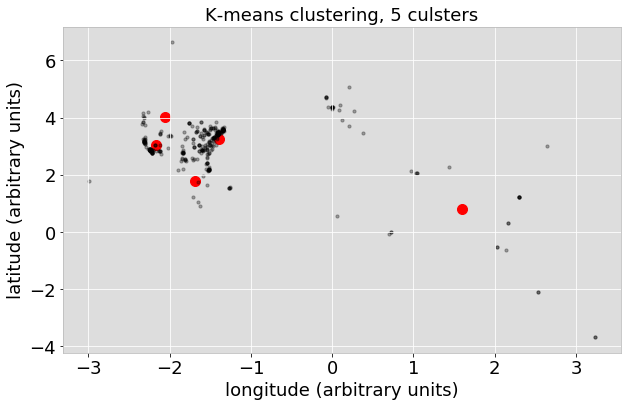

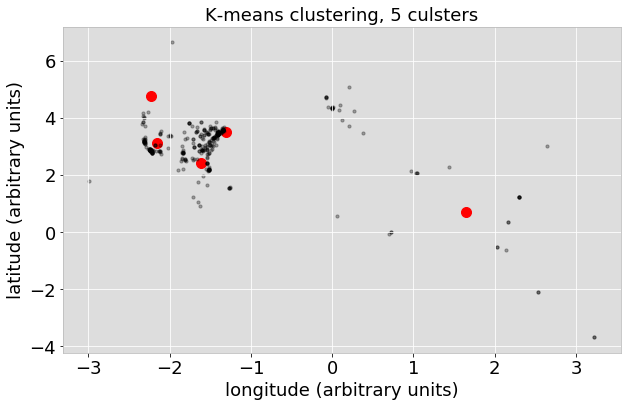

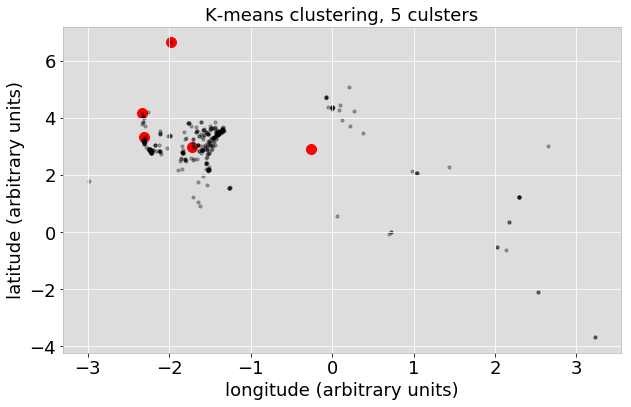

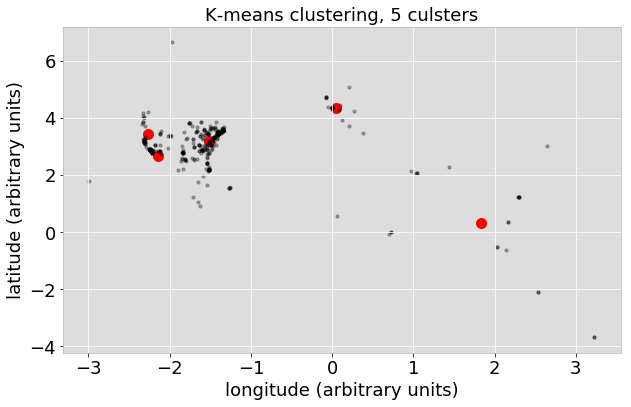

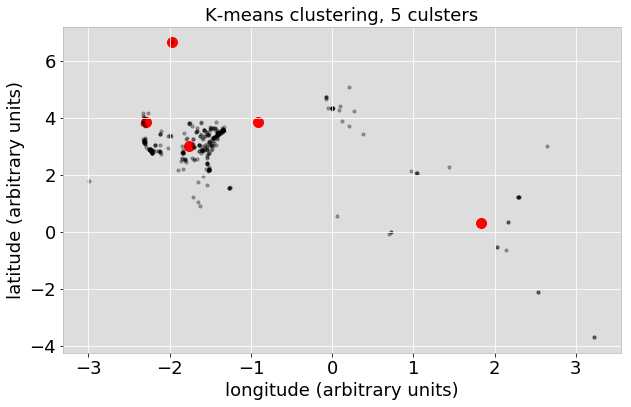

In [102]:
# k means cluster results depend on the starting point, 
# allow random selection of the N=5 cluster centroids
np.random.seed(111)
nk= 5
for i in range(5):
    #repeat the clustering with same number of cluster but different starting points 5 times
    # DO NOT SET SEED
    cluster_centroids, closest_centroids = kmeans2(wc, nk, iter=1)
    pl.figure(figsize=(10, 6))
    pl.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c='r', s=100)
    pl.scatter(wc[:,0], wc[:,1], c='k', alpha=.3, s=10)
    pl.xlabel("longitude (arbitrary units)", fontsize=18)
    pl.ylabel("latitude (arbitrary units)", fontsize=18)
    pl.title("K-means clustering, %d culsters"%nk, fontsize=18)

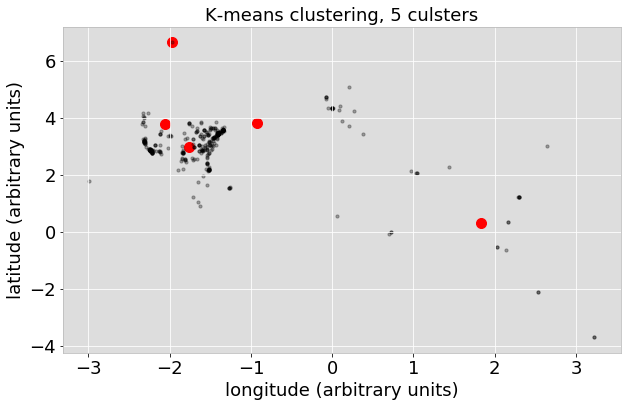

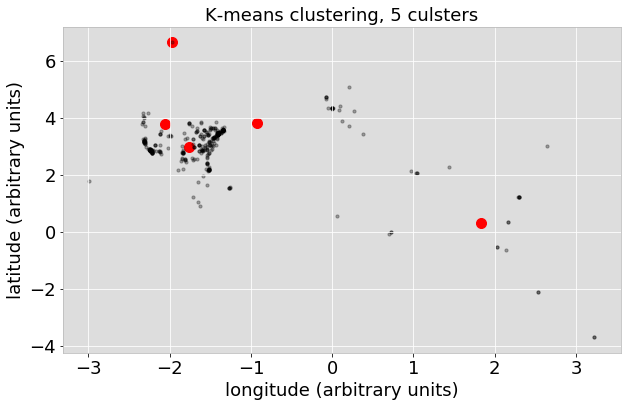

In [103]:
# Now set the centroid and do it twice to see you get the same result
cluster_centroids_save = cluster_centroids
for i in range(2):
    cluster_centroids, closest_centroids = kmeans2(wc, k=cluster_centroids_save,
                                                   iter=1)
    pl.figure(figsize=(10, 6))
    pl.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c='r', s=100)
    pl.scatter(wc[:,0], wc[:,1], c='k', alpha=.3, s=10)
    pl.xlabel("longitude (arbitrary units)", fontsize=18)
    pl.ylabel("latitude (arbitrary units)", fontsize=18)
    pl.title("K-means clustering, %d culsters"%nk, fontsize=18)


In [104]:
#a function to get N different colors from a colormap given an array size N
def get_colors(inp, colormap, vmin=None, vmax=None):
    '''gets N colors from a color map
    Arguments: 
        inp: number of colors
        colormap: color map from matlab cmaps
        vmin, vmax: min max color range
    Return: color values'''
    norm = pl.Normalize(vmin, vmax)
    return colormap(norm(inp))
#kmeans2?
#get the cluster centers
#cluster_centroids, closest_centroids = kmeans2(wc, nk, iter=1, minit='points')
colors = get_colors(closest_centroids, pl.cm.jet)
colorsc = get_colors(np.arange(nk), pl.cm.jet)


[22, 282, 1, 63, 24]


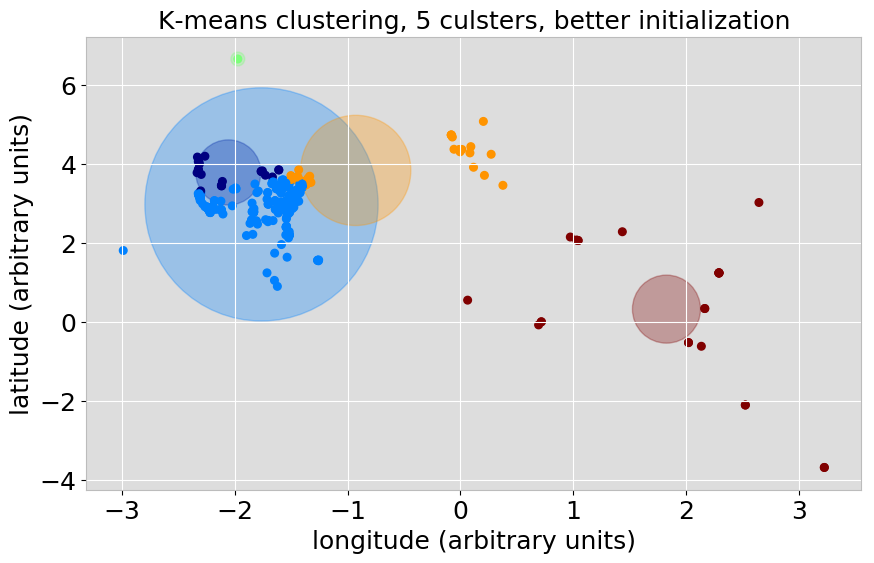

In [105]:
# plot clusters and clusters centers
pl.figure(figsize=(10, 6), dpi=100)
print ([sum(closest_centroids == i) for i in range(nk)])
pl.scatter(cluster_centroids[:,0], cluster_centroids[:,1], c=colorsc, alpha=.3, 
            s=np.array([sum(closest_centroids == i) for i in range(k)])*100)

pl.scatter(wc[:,0], wc[:,1], c=colors, s=30)
pl.xlabel("longitude (arbitrary units)", fontsize=18)
pl.ylabel("latitude (arbitrary units)", fontsize=18)
pl.title("K-means clustering, 5 culsters, better initialization", fontsize=18);

#### Figure caption: the location of tweets containing references to thanksgiving for ~1 hour on 2015-11-27 is plotted.  Tweets are clustered by geographic proximity via k-means clustering. Cluster centers are plotted, with the same colors as cluster points.  The size of the cluster is proportional to the number of points in the cluster

# put it on a map

In [106]:
# You should always move imports to top cell.
# I leave them here to show them to you in context
from mpl_toolkits.basemap import Basemap

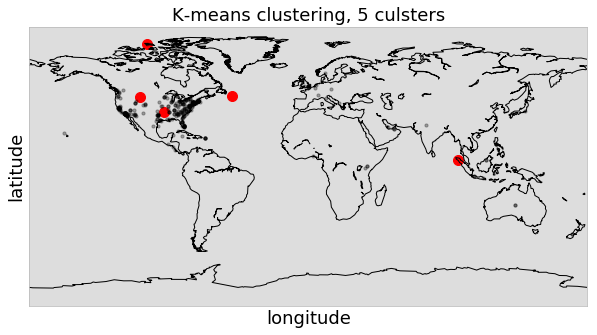

In [107]:
pl.figure(figsize=(10, 6))
pl.scatter(cluster_centroids[:,0]*coordinates.std(axis=0)[0], cluster_centroids[:,1]*coordinates.std(axis=0)[1], c='r', s=100)
pl.scatter(coordinates[:,0],coordinates[:,1], c='k', alpha=.3, s=10)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("K-means clustering, %d culsters"%nk, fontsize=18)
m = Basemap(projection='cyl')
m.drawcoastlines();

# DBScan clustering
## DB scan is density based clustering, as opposed to distance. *Density Based spatial clustering of applications with noise*
## Advantages over K Means: 
    1) finds by itself the correct number of clusters
    2) allows to define points as outliers if not linked closely enough to other points (the word noise in the name refers to this)
    
## You must define
    1) a distance epsilon: the maximum distance that should contain a minimum of min_el elements
    2) a minimum number of elements. If fewer than these elements are within epsilon of a point that point is considered an outlier

In [36]:
# You should always move imports to top cell.
# I leave them here to show them to you in context
#clustering
import sklearn.cluster
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.8, min_samples=2).fit(wc)
labels = (db.labels_).astype(int)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0) # the last statements removes outliers
clusters = pd.Series([coordinates[labels == i] for i in range(num_clusters)])
print('Number of clusters: %d' % num_clusters)


Number of clusters: 9


In [39]:
#function to get the centroid from DBscan as mean of cluster members
# the cluster center is the mean of the cluster for both K Means and DBScan
def getCentroid(points):
    #print points[:,0], np.nanmean(points[:,0])
    return np.nanmean(points[:,0]), np.nanmean(points[:,1])


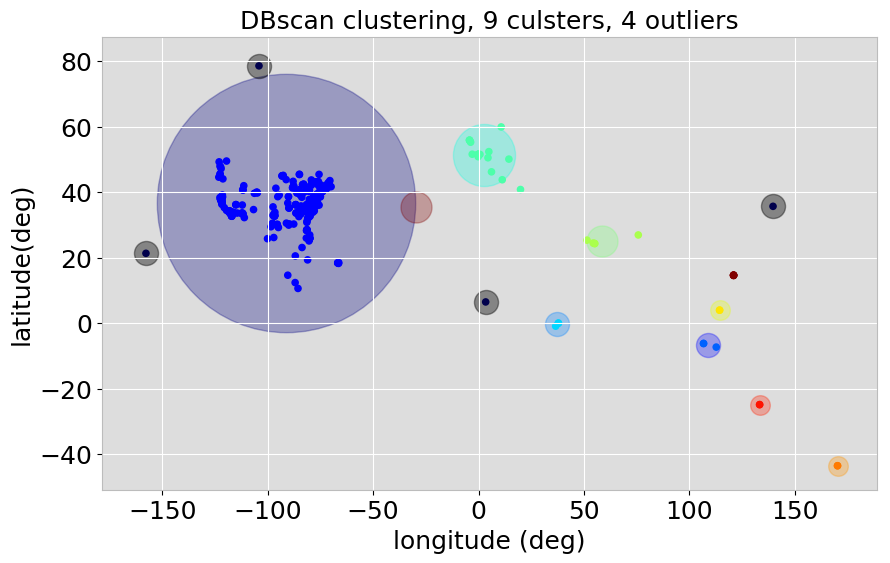

In [40]:
# plot DBScan centroids
centroids = np.zeros((num_clusters,2))

for i in labels:
    centroids[i] = getCentroid(coordinates[labels == i])#
colorsc2 = get_colors(np.arange(num_clusters), pl.cm.jet)

pl.figure(figsize=(10, 6), dpi=100)
for i in np.unique(labels):
    if int(i) == -1:
        continue
    pl.scatter(centroids[i,0], centroids[i,1], c=colorsc2[i], alpha=.3, 
                s=sum(labels == i)*100, 
                label=["%i"%i])
#pl.legend(numpoints=1, scatterpoints=1)
colors2 = get_colors(labels, pl.cm.jet)

pl.scatter(coordinates[:,0], coordinates[:,1], c=colors2, s=20)
pl.scatter(coordinates[:,0][labels==-1], coordinates[:,1][labels==-1], c='k', alpha=0.4, s=300)
pl.xlabel("longitude (deg)", fontsize=18)
pl.ylabel("latitude(deg)", fontsize=18)
pl.title("DBscan clustering, %d culsters, %d outliers"%(num_clusters,
                                                        sum(labels == -1)), fontsize=18);

### Figure caption: the location of tweets contianing references to thanksgiving is plotted, as in Fig 1.  Tweets are clustered by geographic proximity via DBScan clustering. Cluster centers are plotted, same colors as cluster points.  The size of the cluster is proportional to the number of points in the cluster. Outliers are indicated in gray.

# Agglomerative clustering
## hierarchical clustering: allows to recover the hierarchy and decide the number of clusters a posteriori
## you must define  a "linkage" : how clusters relate to points yet outside of clusters

In [52]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=5,  compute_full_tree=True).fit(wc)
labelsag = agc.labels_


In [53]:
centroidsag = np.zeros((5,2))

colorsc3 = get_colors(np.arange(5), pl.cm.jet)
colors3 = get_colors(labelsag, pl.cm.jet)
for i in labelsag:
    centroidsag[i] = getCentroid(coordinates[labelsag == i])

pl.figure(figsize=(10, 6), dpi=100)
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.3, 
            s=np.array([sum(labelsag == i) for i in range(5)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=10)
pl.xlabel("longitude (deg)", fontsize=18)
pl.ylabel("latitude (deg)", fontsize=18)
pl.title("Agglomerative clustering, ward linkage, 5 culsters", fontsize=18);


### Figure caption: the location of tweets containing references to thanksgiving is plotted as in figure 1 and 2.  Tweets are clustered by geographic proximity via Agglomerative clustering with Ward linkage. Cluster centers are plotted, same colors as cluster points.  The size of the cluster is proportional to the number of points in the cluster. 

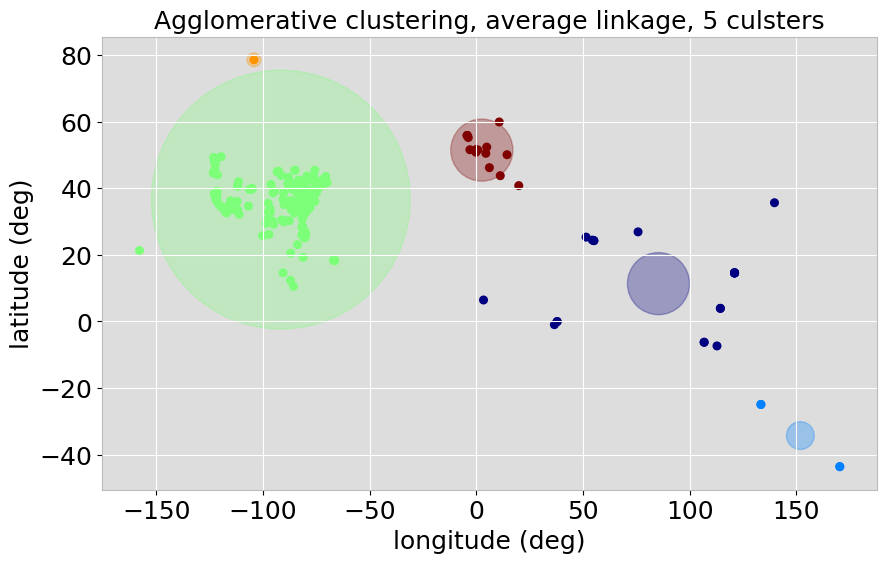

In [55]:
# changing linakge to average (default ward)
agc = AgglomerativeClustering(n_clusters=5,  linkage='average', 
                              compute_full_tree=True).fit(wc)
labelsag = agc.labels_
centroidsag = np.zeros((5,2))

colorsc3 = get_colors(np.arange(5), pl.cm.jet)
colors3 = get_colors(labelsag, pl.cm.jet)
for i in labelsag:
    centroidsag[i] = getCentroid(coordinates[labelsag == i])
    
pl.figure(figsize=(10, 6), dpi=100)
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.3, 
            s=np.array([sum(labelsag == i) for i in range(5)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=30)
pl.xlabel("longitude (deg)", fontsize=18)
pl.ylabel("latitude (deg)", fontsize=18)
pl.title("Agglomerative clustering, average linkage, 5 culsters", fontsize=18);


### Figure caption: the location of tweets containing references to thanksgiving is plotted as in figure 1, 2, 3.  Tweets are clustered by geographic proximity via Agglomerative clustering with average linkage distance. Cluster centers are plotted, same colors as cluster points.  The size of the cluster is proportional to the number of points in the cluster. Outliers are indicated in gray.

# Distance metrics
So far we only used the Euclidian metric (Minkowski matrix order 2: d = sqrt(dx^2 + dy^2) in 2D
Other relevant distances: great circle distance (distance on a sphere)

## Using great circle distance. Notice, this is important: we cannot whiten the data and then use the great circle geometry, because that is based on 179 deg and -179 deg being near each other (as the circle joins back onto itself), and whitening the data will change those values!

In [59]:
from sklearn import mixture
import geopy
from geopy.distance import great_circle
# alreay done the two lines below. just a reminder here
#coordinates = df.as_matrix(columns=['lon', 'lat'])
#wc = whiten(coordinates)

In [60]:
def geo_affinity(M):
    pl.imshow(np.log(np.array([[great_circle(a[-1::-1],
                        b[-1::-1]).miles for a in M] for b in M])), 
              interpolation='nearest', cmap='bone')
    pl.grid(False)
    pl.colorbar()
    #print M
    #print (np.array([[great_circle(a[-1::-1],b[-1::-1]).miles for a in M] for b in M]))
    return (np.array([[great_circle(a[-1::-1],b[-1::-1]).miles for a in M] for b in M]))

def linear_affinity(M, indx1=None, indx2=None, cb=True):
    d = np.log(np.array([[np.sum(np.abs(a[-1::-1]-
                    b[-1::-1])) for a in M] for b in M]))
    if indx1 and indx2:
        d = d[indx1,:]
        d = d[:,indx2]
    pl.imshow(d, 
              interpolation='nearest', cmap='bone')
    pl.grid(False)
    if cb: pl.colorbar()

    return (d)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


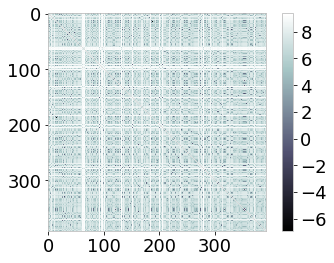

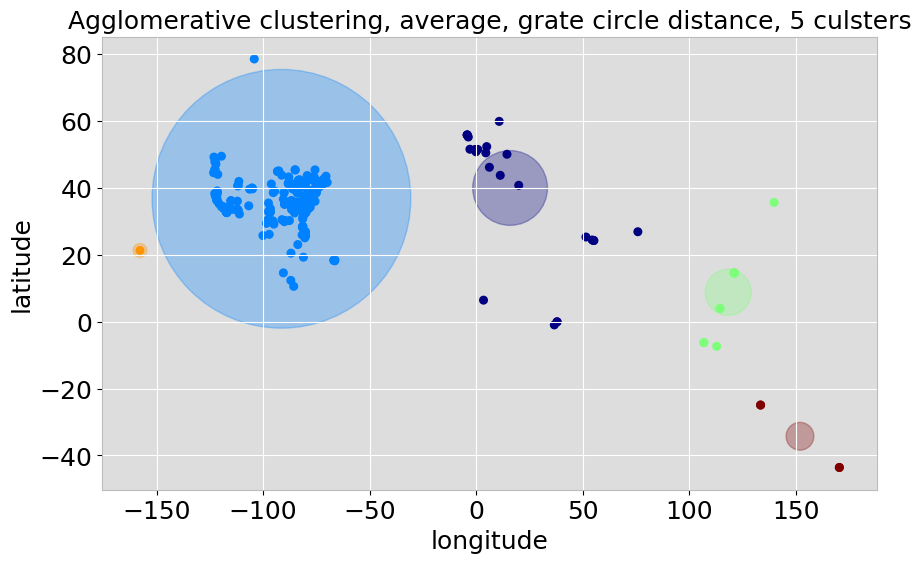

In [61]:
# Using my own defined distance
agc = AgglomerativeClustering(n_clusters=5,  
                              linkage='average', 
                              affinity=geo_affinity).fit(coordinates)
labelsag = agc.labels_
centroidsag = np.zeros((5,2))

colorsc3 = get_colors(np.arange(5), pl.cm.jet)
colors3 = get_colors(labelsag, pl.cm.jet)
for i in labelsag:
    centroidsag[i] = getCentroid(coordinates[labelsag == i])

pl.figure(figsize=(10, 6), dpi=100)
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.3, 
            s=np.array([sum(labelsag == i) for i in range(5)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=30)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, average, grate circle distance, 5 culsters", fontsize=18)

### Figure caption: the location of tweets containing references to thanksgiving is plotted.  Tweets are clustered by geographic proximity via Agglomerative clustering with average linkage Great-Circle distance. Cluster centers are plotted, same colors as cluster points.  The size of the cluster is proportional to the number of points in the cluster. Outliers are indicated in gray.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


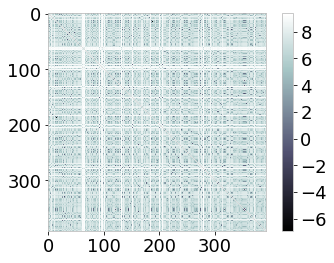

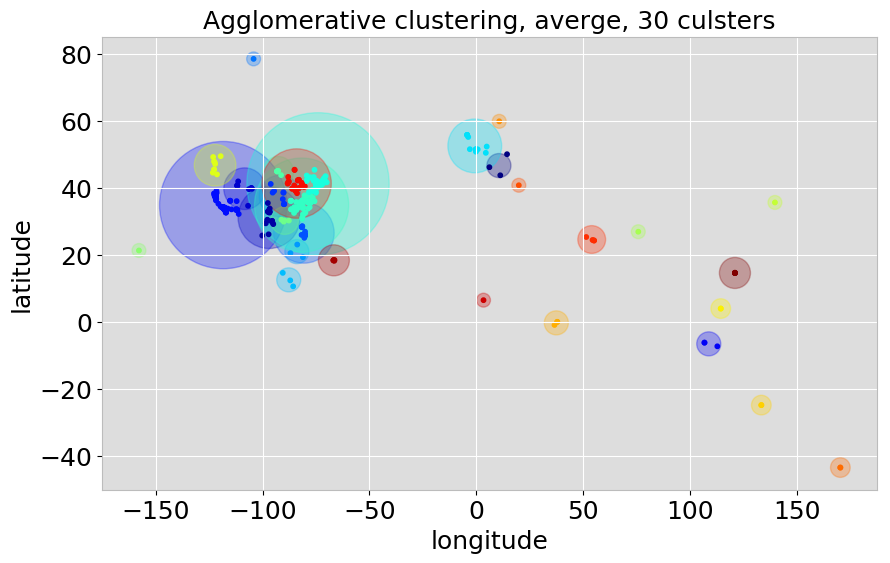

In [62]:
agc = AgglomerativeClustering(n_clusters=30,  
                              linkage='average', 
                              affinity=geo_affinity).fit(coordinates)
labelsag = agc.labels_
centroidsag = np.zeros((30,2))

colorsc3 = get_colors(np.arange(30), pl.cm.jet)
colors3 = get_colors(labelsag, pl.cm.jet)
for i in labelsag:
    centroidsag[i] = getCentroid(coordinates[labelsag == i])

pl.figure(figsize=(10, 6), dpi=100)
#print [sum(labelsag == i) for i in range(30)]
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.3, 
            s=np.array([sum(labelsag == i) for i in range(30)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=10)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, averge, 30 culsters", fontsize=18)

dfc = pd.DataFrame()
dfc['lon'] = centroidsag[:,0]
dfc['lat'] = centroidsag[:,1]
dfc['size'] = np.array([sum(labelsag == i) for i in range(30)])*100

dfc.to_csv('thanksgivingclusters.csv', encoding='utf-8', index=False)

# Agglomerative cluster on eucledian distance dendrogram

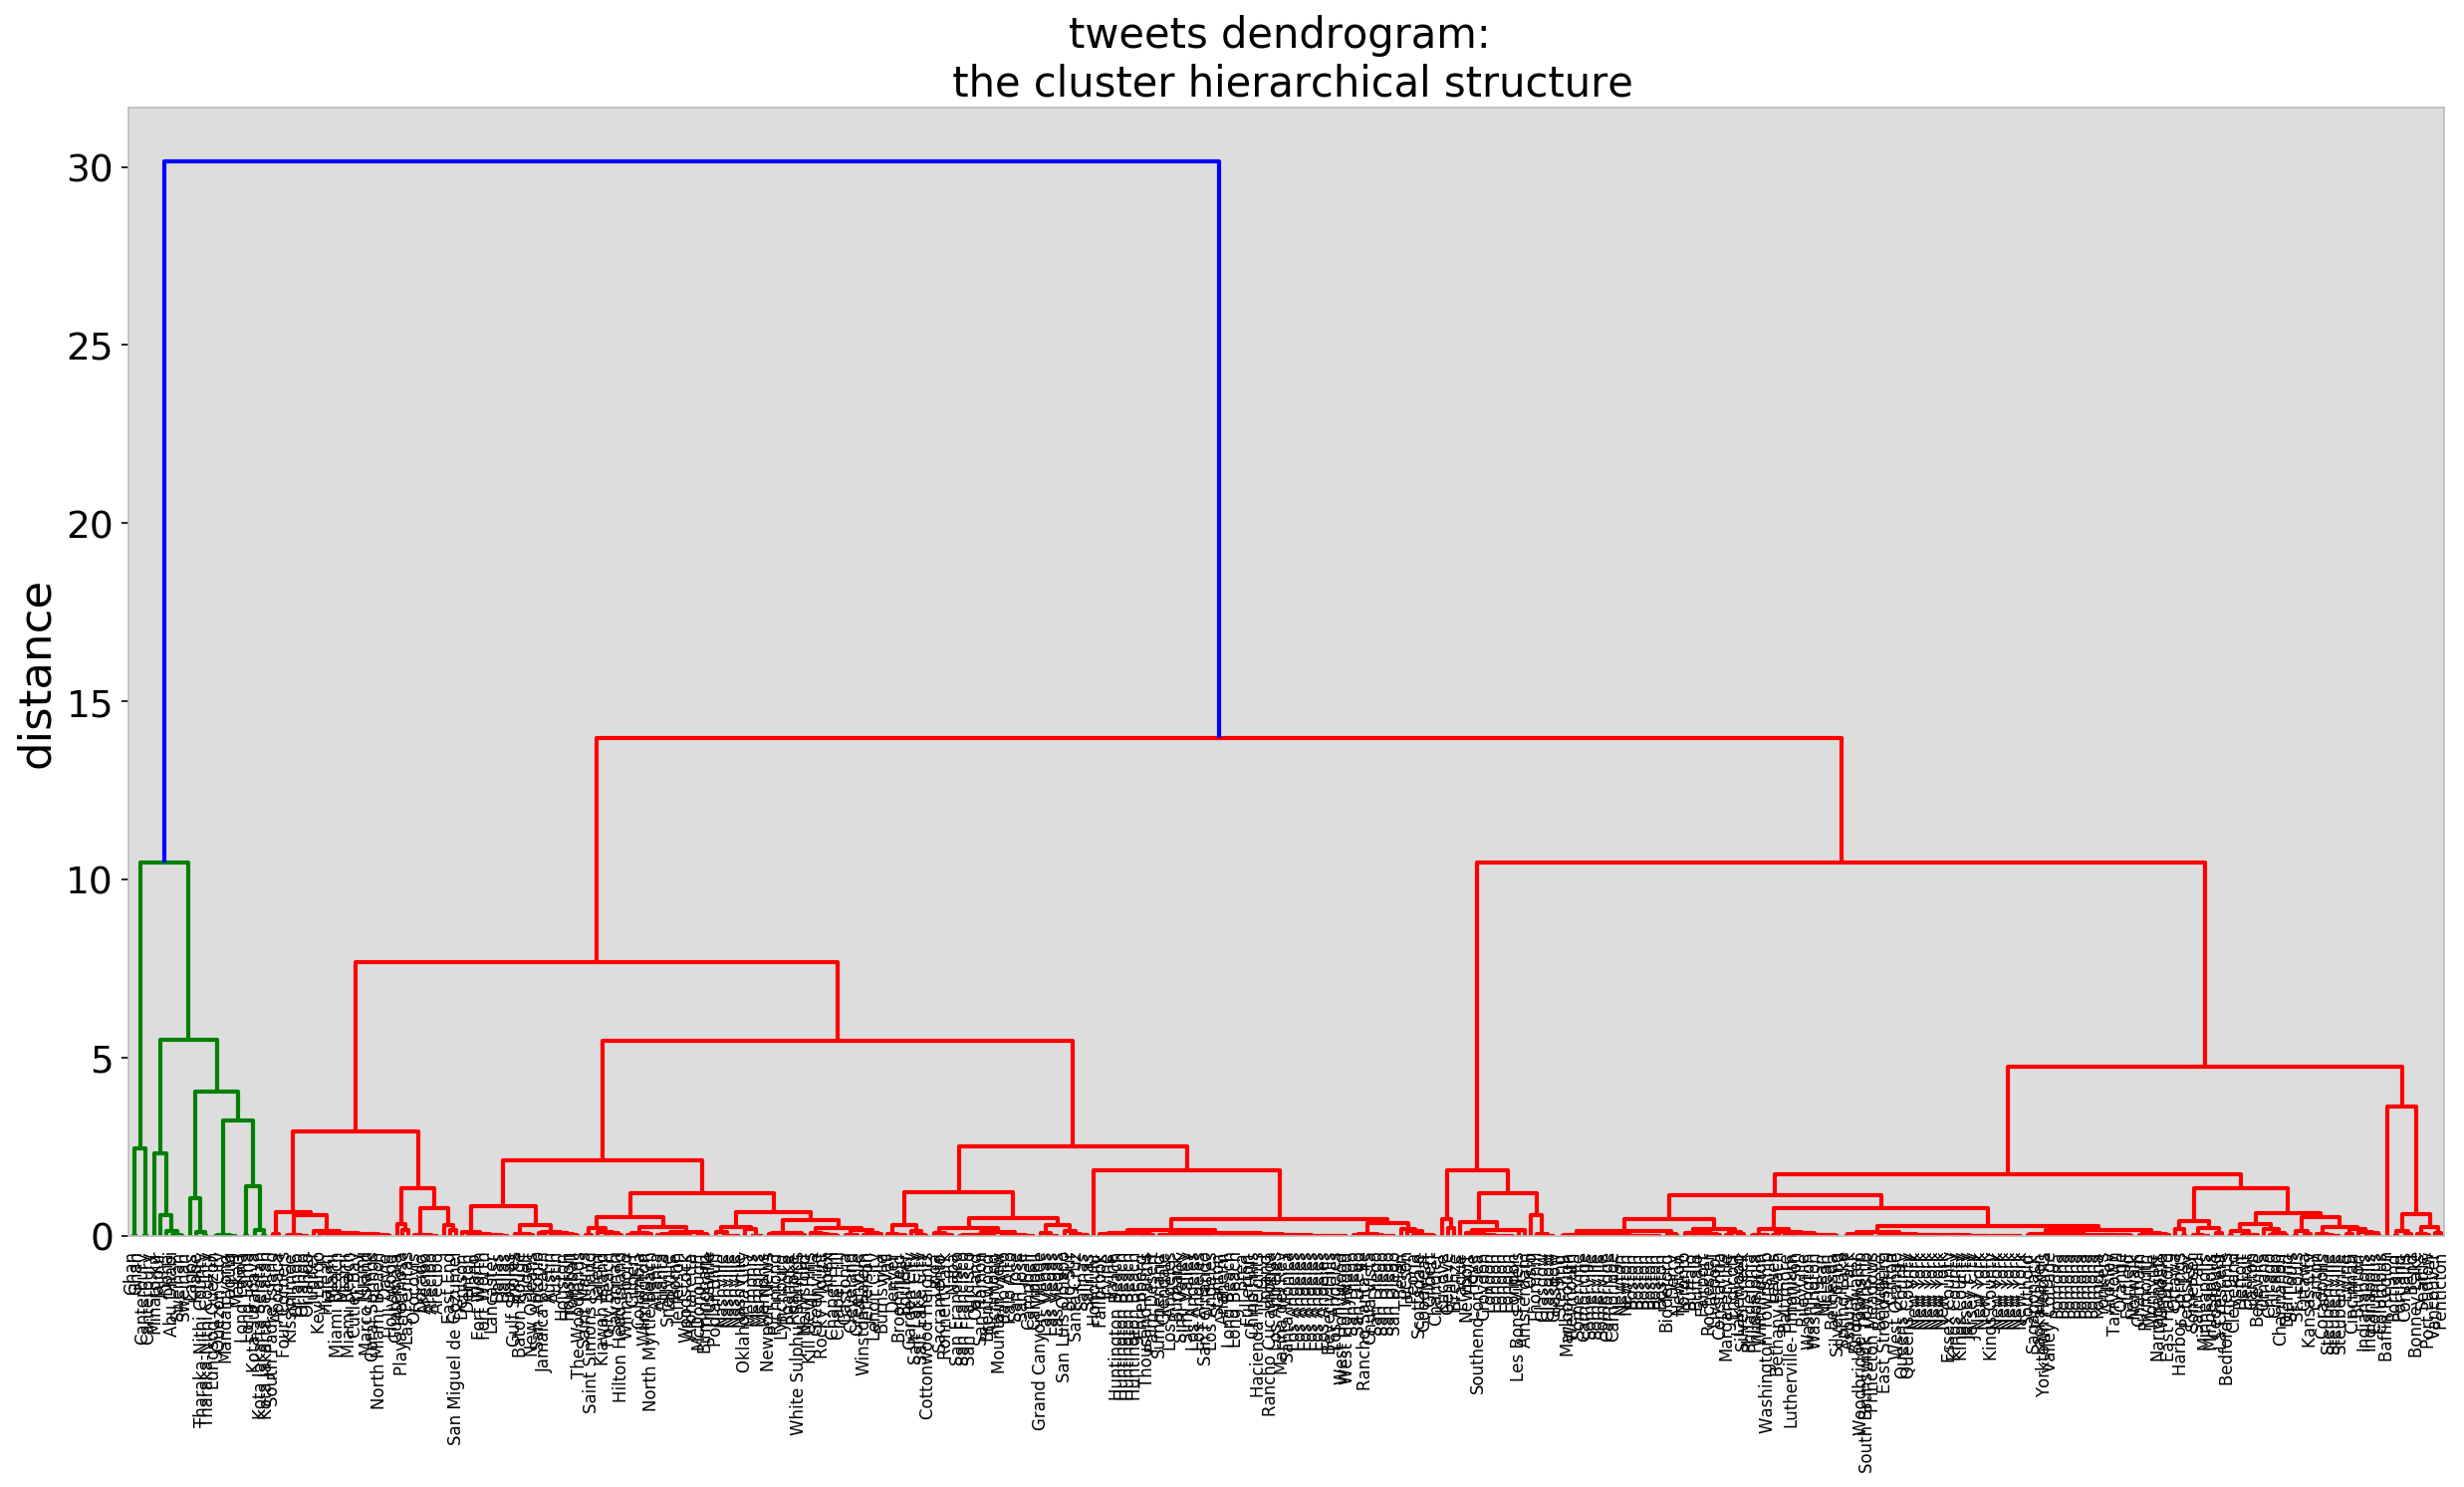

In [63]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(wc, method='ward'),
                               labels = df.city.values,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.grid('off')
title = pl.title("tweets dendrogram: \n the cluster hierarchical structure", fontsize=20)
#this is a dendrogram for inspection of the hierarchical structure

### Figure caption: dandrogram of thanksgiving tweets clusters, eucledian distance in lat-lon space, Ward linkage.

In [65]:
fig = pl.figure(figsize=(10,10))

ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(wc, method='ward'),
                               labels = df.city.values,
                               leaf_rotation=90.,# rotates the x axis labels
                               leaf_font_size=20, truncate_mode='lastp', p=12, 
                               show_contracted=True, color_threshold = 2, 
                               orientation='right', above_threshold_color='k'
                              )  # font size for the x axis labels)
#pl.xticks(rotation=90)
pl.xlabel("distance", fontsize=20)
pl.yticks(fontsize=15, rotation=0)
pl.grid('off')
#scp.hierarchy.dendrogram?


### Figure caption: dandrogram of thanksgiving tweets clusters, eucledian distance in lat-lon space, Ward linkage, truuncated at the last p non-singleton


# F-Cluster

In [67]:
fc = scp.hierarchy.fcluster(scp.hierarchy.linkage(wc, method='ward'), 5, criterion='maxclust',)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


distance matrix ordered by cluster hierarchy


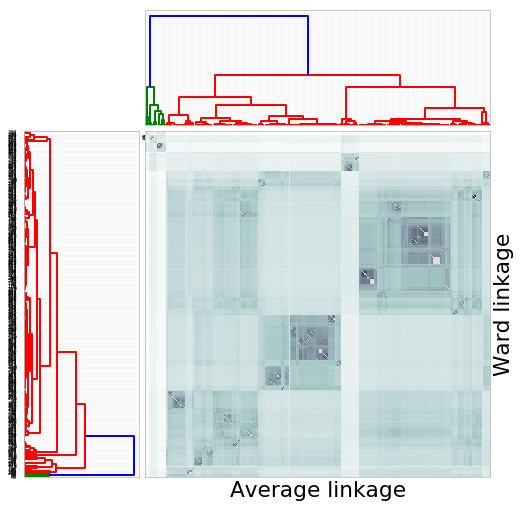

In [93]:
fig = pylab.figure(figsize=(8,8))

# Compute and plot first dendrogram.
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y1 = scp.hierarchy.linkage(wc, method='average')
Z1 = scp.hierarchy.dendrogram(Y1, orientation='right')
ax1.set_xticks([])
#ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y2 = scp.hierarchy.linkage(wc, method='ward')
Z2 = scp.hierarchy.dendrogram(Y2)
#ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
indx1 = Z1['leaves']
indx2 = Z2['leaves']

linear_affinity(coordinates, indx1=indx1, indx2=indx2, cb=False)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

pl.xlabel("Average linkage")
axmatrix.yaxis.set_label_position("right")
pl.ylabel("Ward linkage")

print ("distance matrix ordered by cluster hierarchy")

### Figure caption: distance matrixfor ward vs average linkage in agglomerative clustering using eucledian distance in the lat-lon space for tweets referring to thanksgiving

In [ ]:
#retrieveing the scipy cluster
from scipy.cluster.hierarchy import fcluster
max_d = 1.5
clusters = fcluster(Y1, max_d, criterion='distance')
pl.figure(figsize=(10, 6), dpi=150)

# plot points with cluster dependent 
#colors clusters = fcluster(Y1, max_d, criterion='distance')
pl.scatter(coordinates[:,0], coordinates[:,1], c=clusters, )  
clusters = fcluster(Y2, max_d, criterion='distance')
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, ward linkage", fontsize=18)

# plot points with cluster dependent colors
pl.figure(figsize=(10, 6), dpi=150)
pl.scatter(coordinates[:,0], coordinates[:,1], c=clusters, )  
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, averge linkage", fontsize=18)


# Adding map layers

In [79]:
nk= 5
cluster_centroids, closest_centroids = kmeans2(wc, nk, iter=i)
pl.figure(figsize=(10, 6))
pl.scatter(cluster_centroids[:,0]*coordinates.std(axis=0)[0], cluster_centroids[:,1]*coordinates.std(axis=0)[1], c='r', s=100)
pl.scatter(coordinates[:,0],coordinates[:,1], c='k', alpha=.3, s=10)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("K-means clustering, %d culsters"%nk, fontsize=18)
m = Basemap(width=12000000,height=9000000,projection='cyl',
            resolution=None,lat_1=-90,lat_2=90,lat_0=0,lon_0=0.)
m.shadedrelief();

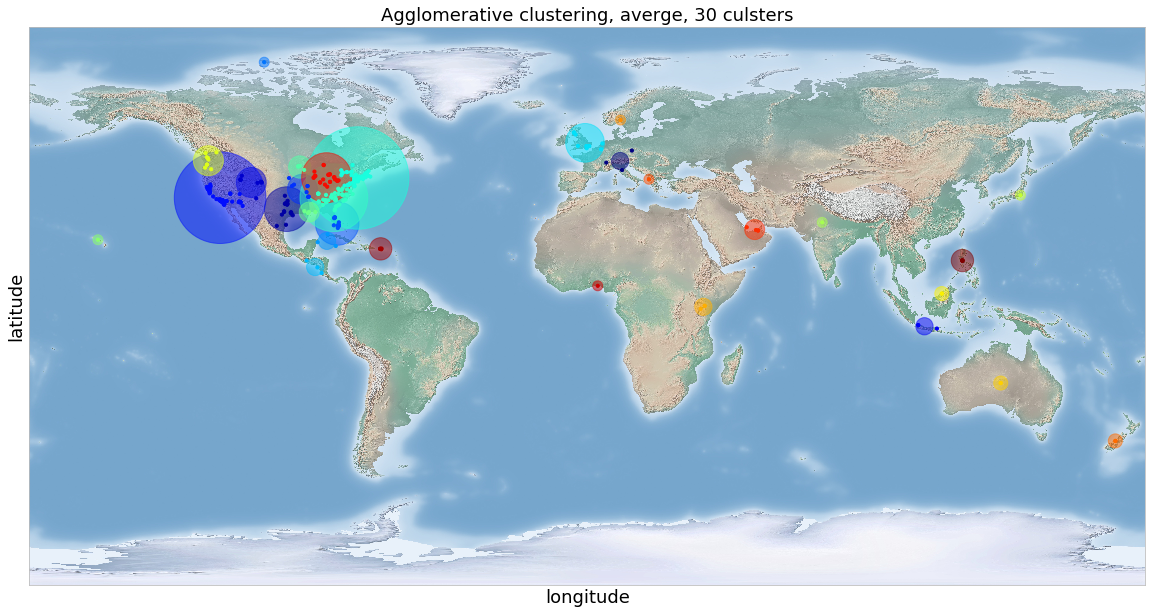

In [80]:
pl.figure(figsize=(20,20))
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colorsc3, alpha=.5, 
            s=np.array([sum(labelsag == i) for i in range(30)])*100)
 
pl.scatter(coordinates[:,0], coordinates[:,1], c=colors3, s=10)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, averge, 30 culsters", fontsize=18)
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='cyl',
            resolution=None,lat_1=-90,lat_2=90,lat_0=0,lon_0=0.)
m.shadedrelief()

# and you can of course get fancier: 
http://cosmo.nyu.edu/~fb55/vizs/clustermap.html
    

# note on great circle distance: the earth is round...
# you have to make some adjustments for longitude 179 and -179 to be considered close on a map

# lets inspect the affinity matrices

for these particular data the linear distance is a good proxy for geographical (great circle) distance, because we are away from the poles, and away from latiture +180/-180 (more below)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


array([[    0.        ,  1513.87971377,   206.04298976, ...,
         2391.7915818 ,    29.87139125,   436.85363421],
       [ 1513.87971377,     0.        ,  1317.43624582, ...,
         1599.66215219,  1522.01905359,  1156.84264604],
       [  206.04298976,  1317.43624582,     0.        , ...,
         2291.75357813,   223.18615437,   241.94598041],
       ..., 
       [ 2391.7915818 ,  1599.66215219,  2291.75357813, ...,
            0.        ,  2378.1999163 ,  2297.11887844],
       [   29.87139125,  1522.01905359,   223.18615437, ...,
         2378.1999163 ,     0.        ,   458.66835075],
       [  436.85363421,  1156.84264604,   241.94598041, ...,
         2297.11887844,   458.66835075,     0.        ]])

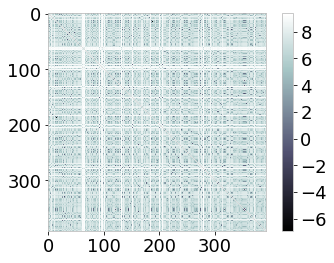

In [81]:
pl.figure()
linear_affinity(coordinates)
pl.figure()
geo_affinity(coordinates)

#let's make up some data where it would be important to use proper geographical distances

In [82]:
#print great_circle(coordinates[0],coordinates,[coordinates[0],41.6713905 ]).miles
print (great_circle([0,40][-1::-1],[2,40][-1::-1]))
print (great_circle([-179,40][-1::-1],[179,40][-1::-1]))
print (great_circle([-179,40][-1::-1],[179,-40][-1::-1]))
print (great_circle([-179,0][-1::-1],[-1,0][-1::-1]))

170.404934758 km
170.404934758 km
8900.41362428 km
19798.2734442 km


In [84]:
mockcoordinates = np.array([[0,40],[2,40],
                            [-169,40],[169,40],
                            [-165,40],[165,40]])
for i,m in enumerate(mockcoordinates[:-2]):
        print (m, mockcoordinates[i+1], great_circle(m[-1::-1], mockcoordinates[i+1][-1::-1]))
pl.figure()
print (linear_affinity(coordinates))
pl.figure()
print (geo_affinity(mockcoordinates))

[ 0 40] [ 2 40] 170.404934758 km
[ 2 40] [-169   40] 11075.9030084 km
[-169   40] [169  40] 1869.69804941 km
[169  40] [-165   40] 2207.37000288 km


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


[[       -inf  3.53385544  1.58813359 ...,  3.92415836 -0.71751283
   2.29237902]
 [ 3.53385544        -inf  3.37967338 ...,  3.61988569  3.54465683
   3.19283267]
 [ 1.58813359  3.37967338        -inf ...,  3.9004614   1.66138889
   1.61020827]
 ..., 
 [ 3.92415836  3.61988569  3.9004614  ...,        -inf  3.91447001
   3.92791543]
 [-0.71751283  3.54465683  1.66138889 ...,  3.91447001        -inf
   2.32927316]
 [ 2.29237902  3.19283267  1.61020827 ...,  3.92791543  2.32927316
         -inf]]


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


[[    0.           105.88471743  6867.96757219  6867.96757219
   6831.01575118  6831.01575118]
 [  105.88471743     0.          6882.24705482  6850.88168052
   6850.88168052  6808.40004843]
 [ 6867.96757219  6882.24705482     0.          1161.77650564
    211.75610353  1371.59612988]
 [ 6867.96757219  6850.88168052  1161.77650564     0.          1371.59612988
    211.75610353]
 [ 6831.01575118  6850.88168052   211.75610353  1371.59612988     0.
   1580.69658377]
 [ 6831.01575118  6808.40004843  1371.59612988   211.75610353
   1580.69658377     0.        ]]


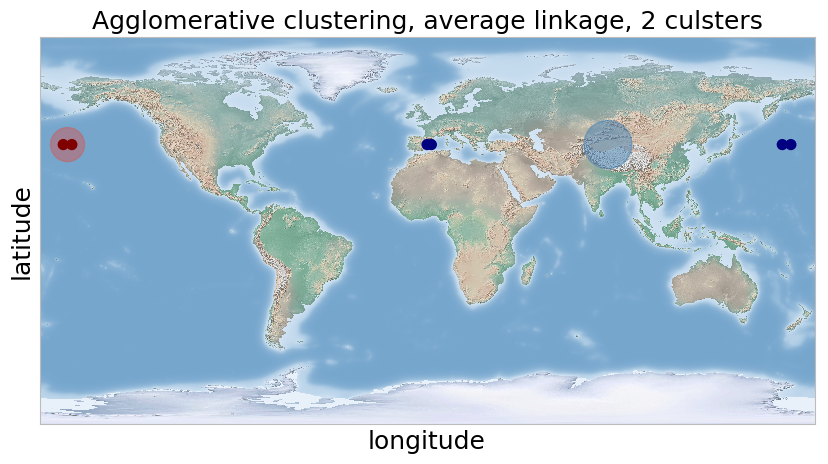

In [85]:
nk = 2
agc = AgglomerativeClustering(n_clusters=nk,  
                              linkage='average', 
                              affinity='euclidean').fit(mockcoordinates)
labelsag = agc.labels_
centroidsag = np.zeros((2,2))
colors = ['SteelBlue','IndianRed']
colors4 = get_colors(labelsag, pl.cm.jet)

for i in labelsag:
    centroidsag[i] = getCentroid(mockcoordinates[labelsag == i])
    
pl.figure(figsize=(10, 6), dpi=100)
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colors, alpha=0.5, 
            s=np.array([sum(labelsag == i) for i in range(2)])*300)
 
pl.scatter(mockcoordinates[:,0], mockcoordinates[:,1], c=colors4, s=50)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, average linkage, 2 culsters", fontsize=18)
m = Basemap(width=12000000,height=9000000,projection='cyl',
            resolution=None,lat_1=-90,lat_2=90,lat_0=0,lon_0=0.)
m.shadedrelief()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


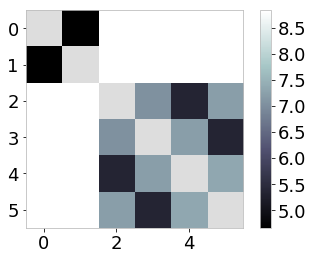

In [86]:
agc_geo = AgglomerativeClustering(n_clusters=2,  
                              linkage='average', 
                              affinity=geo_affinity).fit(mockcoordinates)
labelsag = agc_geo.labels_
centroidsag = np.zeros((2,2))
colors4 = get_colors(labelsag, pl.cm.jet)

for i in labelsag:
    centroidsag[i] = getCentroid(mockcoordinates[labelsag == i])
    
pl.figure(figsize=(10, 6), dpi=100)
pl.scatter(centroidsag[:,0], centroidsag[:,1], c=colors, alpha=0.5, 
            s=np.array([sum(labelsag == i) for i in range(2)])*300)
 
pl.scatter(mockcoordinates[:,0], mockcoordinates[:,1], c=colors4, s=50)
pl.xlabel("longitude", fontsize=18)
pl.ylabel("latitude", fontsize=18)
pl.title("Agglomerative clustering, average linkage,\ngreat circle distance, 2 culsters", fontsize=18)
m = Basemap(width=12000000,height=9000000,projection='cyl',
            resolution=None,lat_1=-90,lat_2=90,lat_0=0,lon_0=0.)
m.shadedrelief();

# NOTE: Basemap is not ideal to plot at the city level

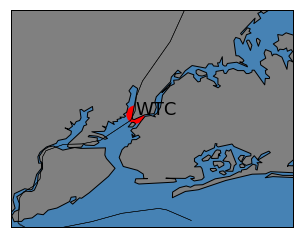

In [109]:
LOW_LEFT_CORNR_LONGITUDE = -74.260380
LOW_LEFT_CORNER_LATITUDE = 40.485808
UP_RIGHT_CORNER_LONGITUDE = -73.699206
UP_RIGHT_CORNER_LATITUDE = 40.917691
MIN_NYC_ISLAND_TO_VISUALIZ = 0.6

m = Basemap(llcrnrlon=LOW_LEFT_CORNR_LONGITUDE,
            llcrnrlat=LOW_LEFT_CORNER_LATITUDE,
            urcrnrlon=UP_RIGHT_CORNER_LONGITUDE,
            urcrnrlat=UP_RIGHT_CORNER_LATITUDE,
            ellps='WGS84',
            resolution='h',
            area_thresh=MIN_NYC_ISLAND_TO_VISUALIZ)

m.drawcoastlines()
m.fillcontinents(color='Gray')
m.drawcountries(linewidth=3)
m.drawstates()
m.drawrivers()

m.drawmapboundary(fill_color='SteelBlue');

pl.text(-74.013002, 40.711381, "WTC")
pl.scatter(-74.013002, 40.711381, s=30, c='r');

https://github.com/je-nunez/Querying_NYC_Single_Line_Street_Base/blob/master/plot_NYC_LION_Geodb.py

### in many cases you get away without having to plot NYC because of its peculiar shape
http://www.danielforsyth.me/mapping-nyc-taxi-data/

In [90]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-74.3,llcrnrlat=40.4,urcrnrlon=-73.7,urcrnrlat=42.2, epsg=4269)
#http://server.arcgisonline.com/arcgis/rest/services
#EPSG Number of America is 4269

pl.figure(figsize=(10, 6), dpi=100)
pl.text(-74.013002, 40.711381, "WTC")
pl.scatter(-74.013002, 40.711381, s=30)
map.arcgisimage(service='World_Physical_Map', xpixels = 15000, verbose= True)
plt.show()

http://server.arcgisonline.com/ArcGIS/rest/services/World_Physical_Map/MapServer/export?bbox=-74.3,40.4,-73.7,42.2&bboxSR=4269&imageSR=4269&size=15000,45000&dpi=96&format=png32&f=image
